In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the raw data
diabetes_data = pd.read_csv('/content/diabetes.csv')

# Check for missing values
missing_values = diabetes_data.isnull().sum()
print("Missing values:")
print(missing_values)

# Impute missing values with column means
cleaned_data = diabetes_data.fillna(diabetes_data.mean())

# Save cleaned data in the current directory
cleaned_data.to_csv('cleaned_diabetes_data.csv', index=False)


Missing values:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


Sample Mean Glucose: 116.64
Population Mean Glucose: 120.89453125
Sample Max Glucose: 183
Population Max Glucose: 199


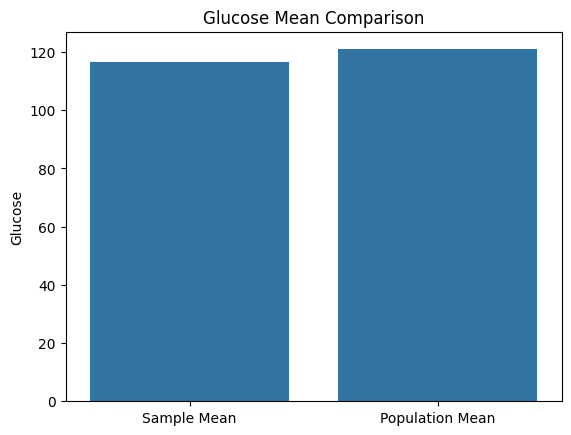

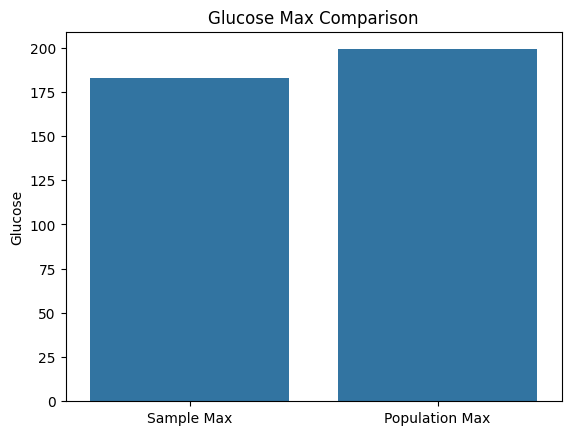

In [6]:
np.random.seed(42)
sample_25 = cleaned_data.sample(25)

# Calculate sample statistics
sample_mean = sample_25['Glucose'].mean()
sample_max = sample_25['Glucose'].max()

# Calculate population statistics
population_mean = cleaned_data['Glucose'].mean()
population_max = cleaned_data['Glucose'].max()

# Print values
print("Sample Mean Glucose:", sample_mean)
print("Population Mean Glucose:", population_mean)
print("Sample Max Glucose:", sample_max)
print("Population Max Glucose:", population_max)

# Chart: Mean Comparison
sns.barplot(x=['Sample Mean', 'Population Mean'], y=[sample_mean, population_mean])
plt.title('Glucose Mean Comparison')
plt.ylabel('Glucose')
plt.show()

# Chart: Max Comparison
sns.barplot(x=['Sample Max', 'Population Max'], y=[sample_max, population_max])
plt.title('Glucose Max Comparison')
plt.ylabel('Glucose')
plt.show()

98th Percentile of BMI (Sample): 40.25
98th Percentile of BMI (Population): 47.53


<ipython-input-14-bda738ae05dd>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Sample 98th %ile', 'Population 98th %ile'],


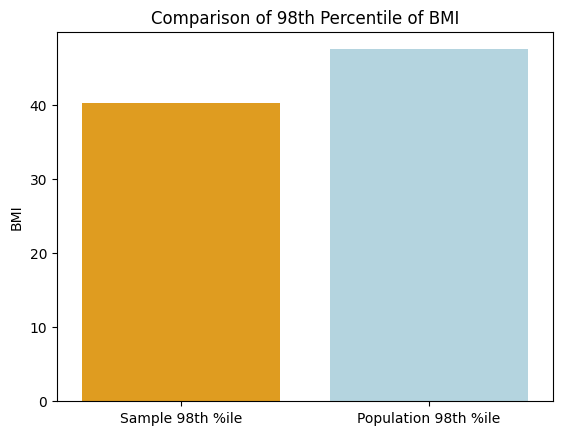

In [14]:
sample_bmi_98 = np.percentile(sample_25['BMI'], 98)
population_bmi_98 = np.percentile(cleaned_data['BMI'], 98)

# Print the values
print("98th Percentile of BMI (Sample):", round(sample_bmi_98, 2))
print("98th Percentile of BMI (Population):", round(population_bmi_98, 2))

# Plot with corrected color usage
sns.barplot(x=['Sample 98th %ile', 'Population 98th %ile'],
            y=[sample_bmi_98, population_bmi_98],
            palette=['orange', 'lightblue'])

plt.title('Comparison of 98th Percentile of BMI')
plt.ylabel('BMI')
plt.show()

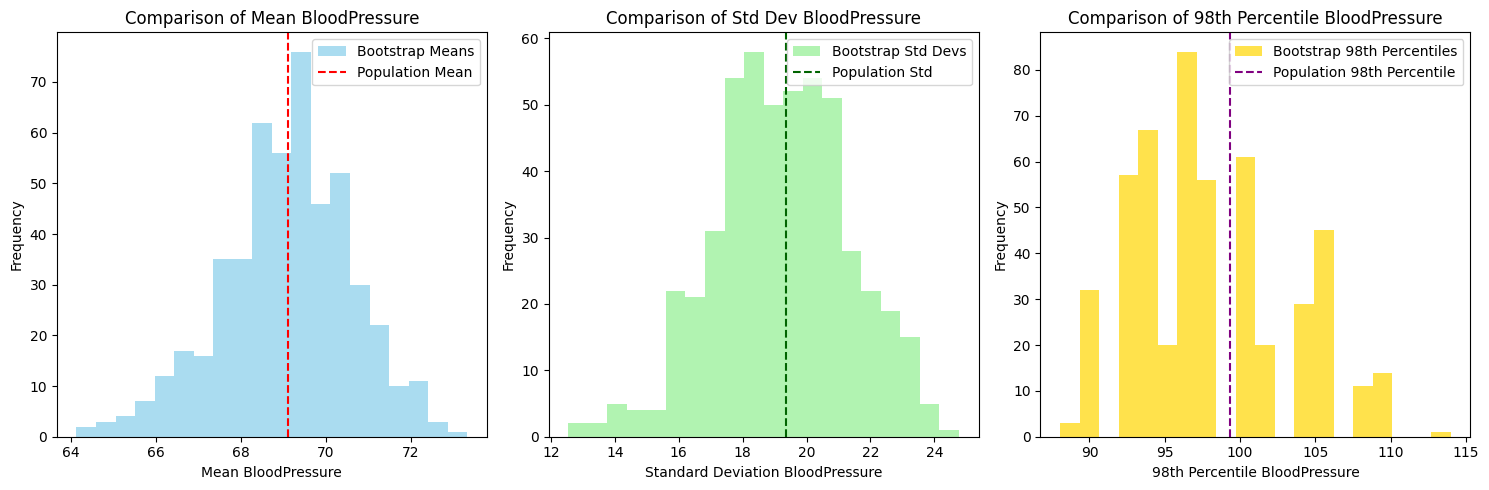

In [21]:
population_bp = diabetes_data['BloodPressure']

# Bootstrap setup
bootstrap_means = []
bootstrap_stds = []
bootstrap_percentiles = []

num_bootstrap_samples = 500
sample_size = 150

# Bootstrap loop
for _ in range(num_bootstrap_samples):
    bootstrap_sample = population_bp.sample(n=sample_size, replace=True)
    bootstrap_means.append(bootstrap_sample.mean())
    bootstrap_stds.append(bootstrap_sample.std())
    bootstrap_percentiles.append(np.percentile(bootstrap_sample, 98))  # ✅ 98th percentile

# Population statistics
population_mean_bp = population_bp.mean()
population_std_bp = population_bp.std()
population_percentile_bp = np.percentile(population_bp, 98)

# Plot histograms with population reference lines
plt.figure(figsize=(15, 5))

# Mean plot
plt.subplot(1, 3, 1)
plt.hist(bootstrap_means, bins=20, color='skyblue', alpha=0.7, label='Bootstrap Means')
plt.axvline(x=population_mean_bp, color='red', linestyle='--', label='Population Mean')
plt.xlabel('Mean BloodPressure')
plt.ylabel('Frequency')
plt.title('Comparison of Mean BloodPressure')
plt.legend()

# Standard deviation plot
plt.subplot(1, 3, 2)
plt.hist(bootstrap_stds, bins=20, color='lightgreen', alpha=0.7, label='Bootstrap Std Devs')
plt.axvline(x=population_std_bp, color='darkgreen', linestyle='--', label='Population Std')
plt.xlabel('Standard Deviation BloodPressure')
plt.ylabel('Frequency')
plt.title('Comparison of Std Dev BloodPressure')
plt.legend()

# 98th percentile plot
plt.subplot(1, 3, 3)
plt.hist(bootstrap_percentiles, bins=20, color='gold', alpha=0.7, label='Bootstrap 98th Percentiles')
plt.axvline(x=population_percentile_bp, color='purple', linestyle='--', label='Population 98th Percentile')
plt.xlabel('98th Percentile BloodPressure')
plt.ylabel('Frequency')
plt.title('Comparison of 98th Percentile BloodPressure')
plt.legend()

plt.tight_layout()
plt.show()